In [1]:
import numpy as np
from numpy import array as arr
import matplotlib.pyplot as plt

 # Linear Regression

Here we explore fitting a linear regression to data using ordinary least squares (OLS).

We use simulated data for practice. The data $X$ are simulated as follows:

$Y = 0.1 X^3 + 0.5 X^2 + 10.2 X - 21 + \epsilon \;\;$ where $\epsilon \sim \mathcal{N}(0,5)$

In words, the dependent variable equals a third order polynomial (cubic) of the one-dimensional independent variable plus Gaussian noise. Below is the cubic $f$ and the function sim_data that simulates the data:

In [2]:
def f(x): return 0.1*x**3 + 0.5*x**2 + 10.2*x - 21.

def sim_data(seed=0):
    np.random.seed(seed)
    min_x, max_x, stepsize = -10, 10, 0.1
    #independent var (does not have to be uniformly space in general):
    X = arr([np.arange(min_x, max_x, stepsize)]).T
    #(N,_) = X.shape
    Y = f(X) + np.random.normal(0,5,size=np.shape(X)) #dependent var
    return X,Y

# Plotting 
First we will plot the simulated data. The dependent variable which we commonly call Y is on the y-axis and the independent variable X is on the x-axis.

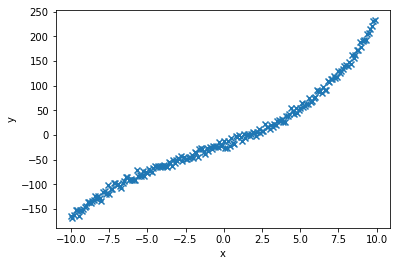

In [3]:
X,Y = sim_data()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X,Y,marker='x')
plt.show()

# Adding an intercept column to the independent variables

We add a new column of ones to the independent array X that allows OLS to use an intercept/systematic bias.

In [4]:
(N,D) = X.shape
X1 = np.hstack((np.ones((N,1)), X))
print('X1 (first 10 rows):\n',X1[:10,:])
print(type(X1))

X1 (first 10 rows):
 [[  1.  -10. ]
 [  1.   -9.9]
 [  1.   -9.8]
 [  1.   -9.7]
 [  1.   -9.6]
 [  1.   -9.5]
 [  1.   -9.4]
 [  1.   -9.3]
 [  1.   -9.2]
 [  1.   -9.1]]
<class 'numpy.ndarray'>



# Ordinary Least Squares

Recall the basic assumption of linear regression: ${\bf Y} = {\bf X}^\top \beta + \epsilon$ where $\epsilon$ is drawn i.i.d. from a normal distribution.

OLS fits this model by minimizing the sum of squared errors in linear regression. 

OLS calculates the unknown coefficients $\beta$ from data as follows:

$\beta = ({\bf X}^\top {\bf X})^{-1} {\bf X}^\top {\bf Y}$

We will calculate $\beta$ using this equation. 
First, remember that when multiplying by matrixes, the inner dimensions must be the same. 
In the end we also want to have a vector equal to the number of coefficients--in this case 2. 
So first we multiply the transpose of X by X. The transpose is just the matrix with the columns and rows switched. 
Since our X matrix is 200,2 the transpose will have the shape 2,200.
Multiplying the transpose by the X matrix gives us a 2, 2 matrix.

The inverse of a matrix is more difficult to explain. Essentially, when the inverse of a matrix is multiplied by the non-inversed matrix, it returns the identity matrix. The identity matrix is a matrix where the diagonal elements are equal to 1 and the off-diagonal elements are equal to zero. 
The inverse will have the same dimensions so we still have a 2,2 matrix. 


In [5]:
mX1 = np.asmatrix(X1)
print(mX1.shape)
print(np.transpose(mX1).shape)
XX = np.matmul(np.transpose(mX1),mX1)
XX2 = np.matmul(XX.I,np.transpose(mX1))
b = np.matmul(XX2,Y)
print(b)
#XX2= np.transpose(XX2)
print("Coefficient on X is " ,b.item(1))
XXi =XX.I
i = np.matmul(XX,XXi)
print(i)

(200, 2)
(2, 200)
[[-4.18277421]
 [16.10346643]]
Coefficient on X is  16.10346642623628
[[1. 0.]
 [0. 1.]]


# Warning
However, be aware that it is better to avoid matrix inversions in practice, as it can be a numerically unstable operation. In this case, the premultiplier to ${\bf Y}$ is known as the Moore-Penrose psuedoinverse of ${\bf X}$:

${\bf M} = ({\bf X}^\top {\bf X})^{-1} {\bf X}^\top$

and there is a function in the numpy package that can calculate it:

In [6]:
M = np.linalg.pinv(X1)
b2 = np.matmul(M,Y)
print("Manual inversion of matrix ", b2)
#print(str(b2[0]),str(b2[1]))
print("Numpy package inversion ", b)

Manual inversion of matrix  [[-4.18277421]
 [16.10346643]]
Numpy package inversion  [[-4.18277421]
 [16.10346643]]


# Predicting Y
Now that we have the coefficients, we can calculate other summary statistics. $\hat{Y}$ is the predicted value of Y based on the fit of our regression model. To calculate the values, we multiply our X values by the coefficients in the model.
In general,
$\hat{Y} = \beta*X1+\beta*X2$
for as many independent variables as we have in the model.

In [7]:
Y_hat = np.dot(X1, b2)
print(Y[:5,:])
Y_hat[:5,:]

[[-164.17973827]
 [-168.00411396]
 [-162.16551008]
 [-152.957834  ]
 [-151.97581005]]


array([[-165.21743848],
       [-163.60709183],
       [-161.99674519],
       [-160.38639855],
       [-158.7760519 ]])

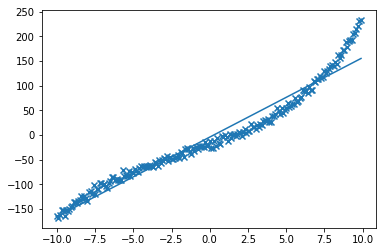

In [8]:
#now plot the original data and the linear regression fit:
plt.scatter(X1[:,1],Y,marker='x')
plt.plot(X1[:,1],Y_hat)

# Residuals
We can also use $\hat{Y}$ to calculate the residuals from the model. The residuals are, as we've discussed, the difference between the actual and the predicted values of Y. Positive residual values indicate that the model underpredicted Y and negative values that it underpredicted Y.

The total variance of Y in the data (or total sum of squares) can be attributed the explained sum of squares (ESS) and the residual sum of squares (RSS). The residual sum of squares is:
$$\sum_{i=1}^{n} (Y-\hat{Y})^2$$

We will use epsilon ($\epsilon$) for  residuals where

$\epsilon = (Y-\hat{Y})$


In [ ]:
residuals = (Y - Y_hat)
SR = residuals**2
print('Residual sum of squares', SR.sum())
print('Mean squared error of residuals', SR.sum()/(N-D-1))
print("The sum of residuals is","{0:.4f}".format(residuals.sum()))

In [10]:
total_var = Y.var()
explained_var = total_var - (residuals**2).sum()/float(N)
r2 = explained_var / total_var
print('total_var, explained_var, r-squared:\n', total_var, explained_var, r2)

total_var, explained_var, r-squared:
 9086.707864556905 8643.838263338126 0.9512618202521718


Text(0,0.5,'frequency')

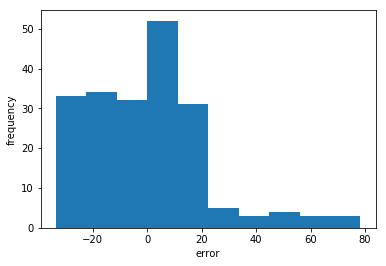

In [11]:
plt.hist(residuals)
plt.xlabel('error')
plt.ylabel('frequency')

# Comparison with Python package

Now we will compare our results with the Python package statsmodels. 

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(Y,X1).fit()
# Print out the statistics
print(model.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[-4.18277421 16.10346643]


In [13]:
print(model.summary())
print("The Mean squared error of residuals is "+ str(model.mse_resid))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3865.
Date:                Tue, 08 May 2018   Prob (F-statistic):          7.29e-132
Time:                        20:56:05   Log-Likelihood:                -893.12
No. Observations:                 200   AIC:                             1790.
Df Residuals:                     198   BIC:                             1797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1828      1.496     -2.797      0.0

# Calculating standard errors
The statsmodels output has a feature that we have not calculated: The standard errors of the coefficients. 
To calculate this we need a couple of things. The first is based on the residual sum of squares but it is divided by the degrees of freedom in the data. Using this we can then calculate the variance-covariance matrix. 
Then we take the square root of each of the diagonal elements of the variance covariance matrix to get the standard errors. 

In [14]:

dsig=sum(np.square(Y-np.matmul(mX1,b)))/(mX1.shape[0]-mX1.shape[1])
print(dsig)
vcv=np.dot(np.asscalar(dsig),np.linalg.inv(np.matmul(np.transpose(mX1),mX1)))
print(np.sqrt(np.diag(vcv)))

[[447.34303153]]
[1.49562125 0.25904272]


Text(0,0.5,'residual error')

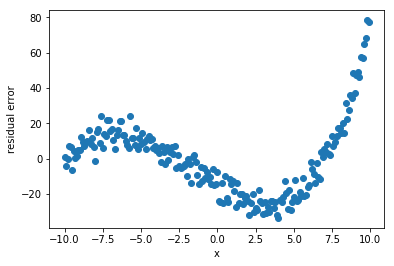

In [15]:
plt.scatter(X,residuals)
plt.xlabel('x')
plt.ylabel('residual error')